In [1]:
'''Author : Karan Chauhan
github : @Karan-Chauhan19
Organization : L.J University
'''

'Author : Karan Chauhan\ngithub : @Karan-Chauhan19\nOrganization : L.J University\n'

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/karan-chauhan/WorkStation/Project/Bank-Marketing-Campaign/Data/bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
#Rename column name
df = df.rename(columns={'y':'deposit','housing':'house_loan','loan':'personal_loan','previous':'pre_campaign'})

In [20]:
df['pre_campaign'].describe()

count    49732.000000
mean         0.576892
std          2.254838
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: pre_campaign, dtype: float64

In [5]:
df.head()

,age,job,marital,education,default,balance,house_loan,personal_loan,contact,day,month,duration,campaign,pdays,pre_campaign,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#To check if there duplicate value in dataset
df.duplicated().sum()

np.int64(4521)

In our dataset total 4521 duplicated value so we are drop that duplicated value

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

Now 0 duplicated value in our dataset

In [11]:
#To check if there null value in dataset
df.info()
'''In our data 0 null values'''

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int64 
 1   job            45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance        45211 non-null  int64 
 6   house_loan     45211 non-null  object
 7   personal_loan  45211 non-null  object
 8   contact        45211 non-null  object
 9   day            45211 non-null  int64 
 10  month          45211 non-null  object
 11  duration       45211 non-null  int64 
 12  pre_campaign   45211 non-null  int64 
 13  pdays          45211 non-null  int64 
 14  previous       45211 non-null  int64 
 15  poutcome       45211 non-null  object
 16  deposit        45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


'In our data 0 null values'

From this pie chart it can be said that our dataset is imbalanced dataset.

## Job vs Deposit bar plot

<Axes: title={'center': 'Job vs Deposit'}, xlabel='job'>

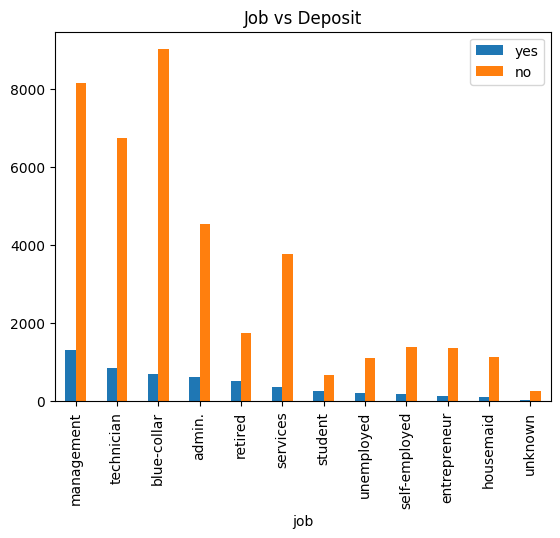

In [12]:
jd = pd.DataFrame()

jd['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
jd['no'] = df[df['deposit'] == 'no']['job'].value_counts()

jd.plot.bar(title='Job vs Deposit')

From the bar plot, it can be said that the highest number of people in management jobs have subscribed to a term deposit, while the lowest number of people with unknown job titles have subscribed to a term deposit. And the highest number of people in blue-collar jobs have unsubscibed to a term deposit.

## Personal loan vs housing loan

In [65]:
# We check who have both loans
ph = pd.DataFrame()

ph['yes'] = df[df['personal_loan'] == 'yes']['house_loan'].value_counts()
ph['no'] = df[df['personal_loan'] == 'no']['house_loan'].value_counts()

ph

,yes,no
house_loan,,
yes,4367,20763
no,2877,17204


From this dataframe we can said that 4367 customer has both loans and 17204 customer has not any loans. from this we check who has both loans and subscribed to term deposit and who has not any loans and subscribed to term deposit

<Axes: title={'center': 'Both_loans vs Deposit'}, xlabel='both_loans'>

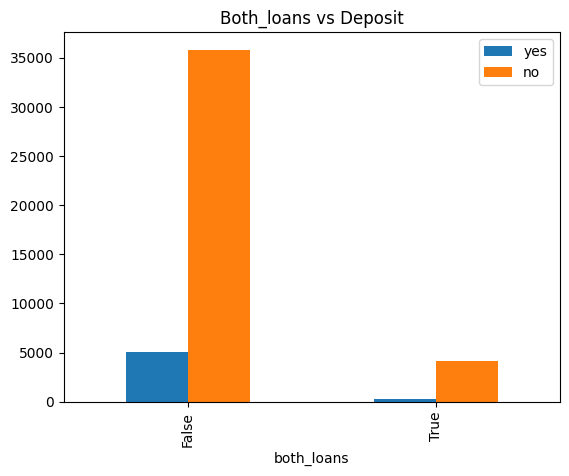

In [70]:
df['both_loans'] = (df['house_loan'] == 'yes') & (df['personal_loan'] == 'yes')
df['no_loans'] = (df['house_loan'] == 'no') & (df['personal_loan'] == 'no')
df['only_one_loan'] = ~df['both_loans'] & ~df['no_loans']  # Those with only one loan

#Now we check who have both loans and subcribed to term deposit
pbl = pd.DataFrame()
pbl['yes'] = df[df['deposit'] == 'yes']['both_loans'].value_counts()
pbl['no'] = df[df['deposit'] == 'no']['both_loans'].value_counts()

pbl.plot.bar(title='Both_loans vs Deposit')

From this bar plot it can be said that those who have both the loans are not subscribed and those who don't have any loans are subscribed. This is a clear indication that the loan is a barrier to subscription.

<Axes: title={'center': 'No_loans vs Deposit'}, xlabel='no_loans'>

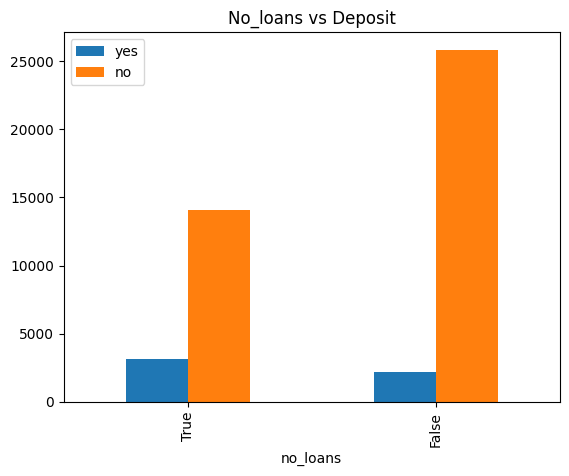

In [73]:
#Now we check who don't have any loans and subscribed loans
pnl = pd.DataFrame()
pnl['yes'] = df[df['deposit'] == 'yes']['no_loans'].value_counts()
pnl['no'] = df[df['deposit'] == 'no']['no_loans'].value_counts()

pnl.plot.bar(title='No_loans vs Deposit')


from this bar plot it can be said that who don't have ant loans and who have loans are in the nearly same number.

<Axes: title={'center': 'Both_loans vs Deposit'}, xlabel='only_one_loan'>

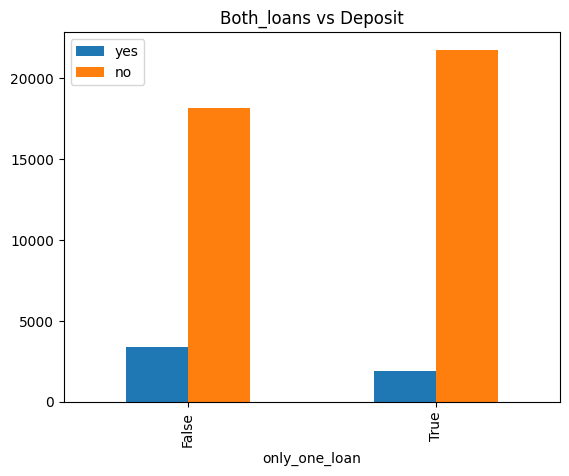

In [74]:
#Now we check who have one loan from both and subcribed to term deposit
ool = pd.DataFrame()
ool['yes'] = df[df['deposit'] == 'yes']['only_one_loan'].value_counts()
ool['no'] = df[df['deposit'] == 'no']['only_one_loan'].value_counts()

ool.plot.bar(title='Both_loans vs Deposit')


From this bar plot it can be said that the number of highest customer dont't have subcribed to term deposit who have one loans both of one. 

## Education vs Deposit bar plot

<Axes: title={'center': 'Education vs Deposit'}, xlabel='education'>

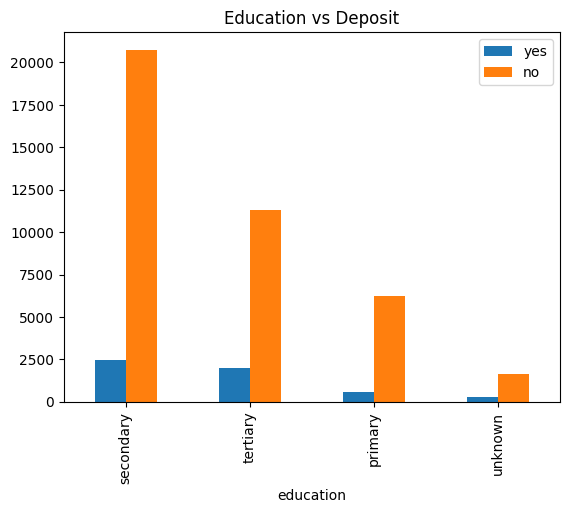

In [13]:
ed = pd.DataFrame()

ed['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
ed['no'] = df[df['deposit'] == 'no']['education'].value_counts()

ed.plot.bar(title='Education vs Deposit')

from the bar plot it can be said that the highest number of people whose education is secondary have subscribed to term deposit, while the lowest number of people whose education is unknown have subscribed to term deposit and highest number of people whose education is secondary have unsubscribed to term deposit

##  Marital vs Deposit bar plot

<Axes: title={'center': 'Marital vs Deposit'}, xlabel='marital'>

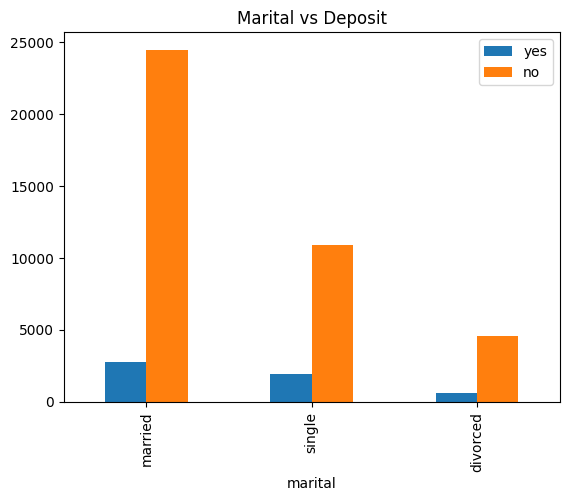

In [14]:
md = pd.DataFrame()
md['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
md['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

md.plot.bar(title='Marital vs Deposit')

from this bar plot it can be said that the highest number of people whose marital status is married have subscribed to term deposit, while lowest number of people whose marital status is divorced have subscribed to term deposit. And highest number people whose marital status is married have unsubscribed to term deposit

## Contact vs Deposit bar plot

<Axes: title={'center': 'Contact vs Deposit'}, xlabel='contact'>

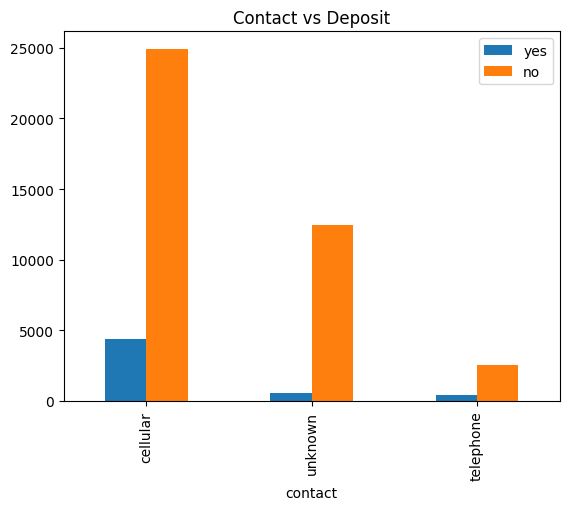

In [15]:
cd = pd.DataFrame()

cd['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
cd['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

cd.plot.bar(title='Contact vs Deposit')

From this bar plot it can be said that the highest number of the term deposit is subscribed to the people who made the call through the cellular medium, while lowest number of the term deposit is subscribed to the people whoo made the call through the telephone medium.

## Month vs Deposit bar plot

<Axes: title={'center': 'Month vs Deposit'}, xlabel='month'>

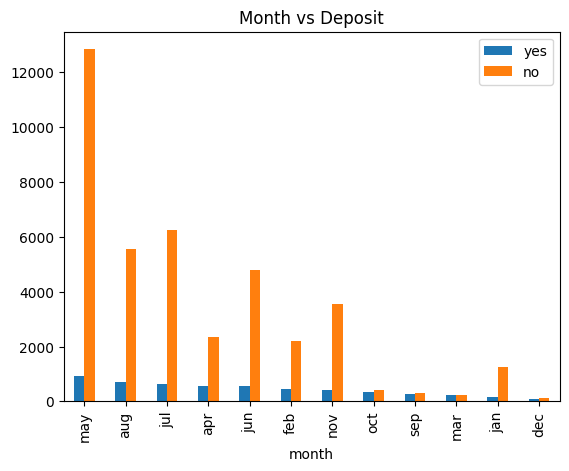

In [16]:
MD = pd.DataFrame()

MD['yes'] = df[df['deposit'] == 'yes']['month'].value_counts()
MD['no'] = df[df['deposit'] == 'no']['month'].value_counts()

MD.plot.bar(title='Month vs Deposit')

from this bar plot it can be said that In may,aug,jul,apr,jun and feb month highest number of people have subscribe to term deposit,while
in oct,sep,mar,jan and dec month lowest number of people have subscribed to  term deposit

May month has more calls than any other month.
Looking at this bar plot, it seems that there are more success in the month of August Because the calls have been reduced and the successors have been found more

## Default vs Deposit

<Axes: title={'center': 'Default vs Deposit'}, xlabel='default'>

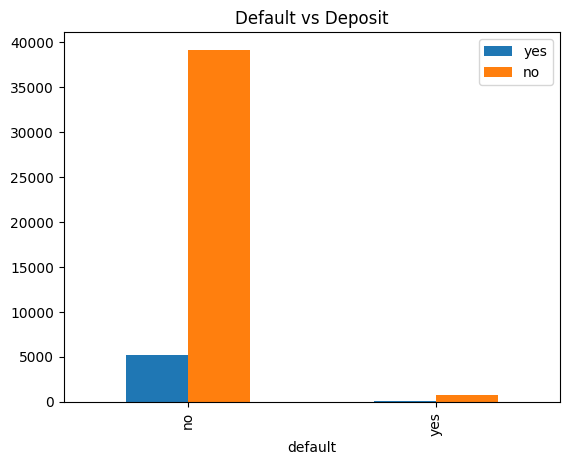

In [17]:
dd = pd.DataFrame()

dd['yes'] = df[df['deposit'] == 'yes']['default'].value_counts()
dd['no'] = df[df['deposit'] == 'no']['default'].value_counts()

dd.plot.bar(title='Default vs Deposit')

**Default column is represent customer's old loan is outstanding or not?**
from this plot it can be said that customers whose old loan is outstanding are not subscribing to any term deposit.

## House Loan vs Deposit

<Axes: title={'center': 'House loan vs Deposit'}, xlabel='house_loan'>

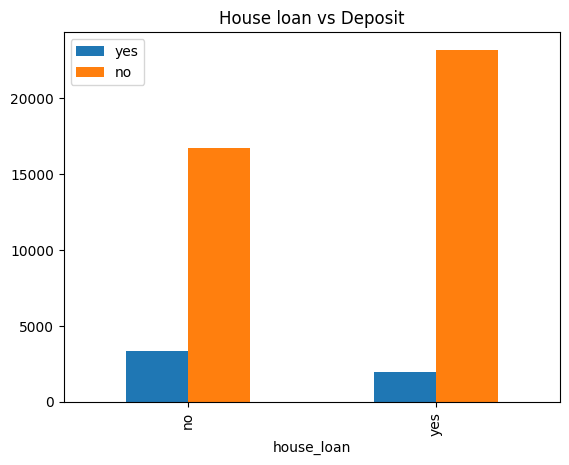

In [18]:
hd = pd.DataFrame()

hd['yes'] = df[df['deposit'] == 'yes']['house_loan'].value_counts()
hd['no'] = df[df['deposit'] == 'no']['house_loan'].value_counts()

hd.plot.bar(title='House loan vs Deposit')

From this bar plot it can be said that the more number of people subscribe to term deposit who have not house loan and the more number of 
people don't subscribe to term deposit who have house loan

## Personal Loan vs Deposit

<Axes: title={'center': 'Personal loan vs Deposit'}, xlabel='personal_loan'>

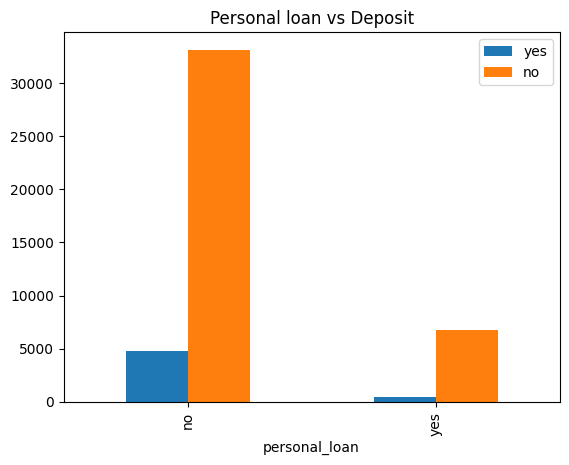

In [19]:
pld = pd.DataFrame()

pld['yes'] = df[df['deposit'] == 'yes']['personal_loan'].value_counts()
pld['no'] = df[df['deposit'] == 'no']['personal_loan'].value_counts()

pld.plot.bar(title='Personal loan vs Deposit')

From this bar plot it can be said that the lowest number of people don't subcribe to term deposit who have personal loan and highest number of people subscribe to term deposit who have not personal loan.
And the banks have called more people who do not have a personal loan

## Poutcome vs Deposit

<Axes: title={'center': 'Poutcome vs Deposit'}, xlabel='poutcome'>

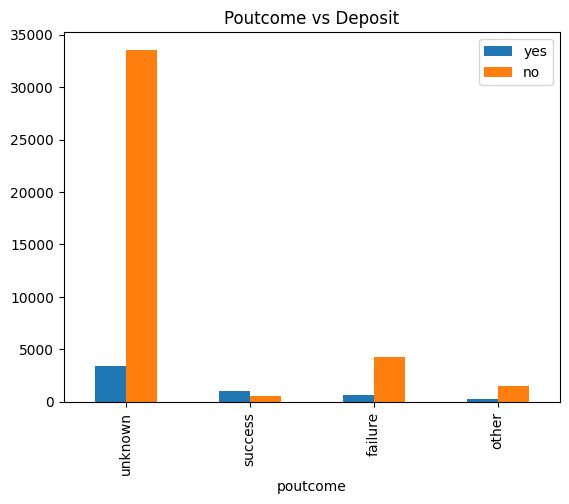

In [54]:
pod = pd.DataFrame()

pod['yes'] = df[df['deposit'] == 'yes']['poutcome'].value_counts()
pod['no'] = df[df['deposit'] == 'no']['poutcome'].value_counts()

pod.plot.bar(title='Poutcome vs Deposit')

From this bar plot it can be said that which customer subscribed in previous campaign is more likely to subcribe in current campaign but in this we loss some customer who subscribed in previous campaign and also some customer who didn’t subscribe in previous campaign subscribed in current campaign. Some new customer also subscribed in current campaign.

## Age vs Deposit

In [20]:
ad = pd.DataFrame()

ad['yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
ad['no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']
ad

,yes,no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


In [21]:
ad

,yes,no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<Axes: title={'center': 'age vs deposit'}>

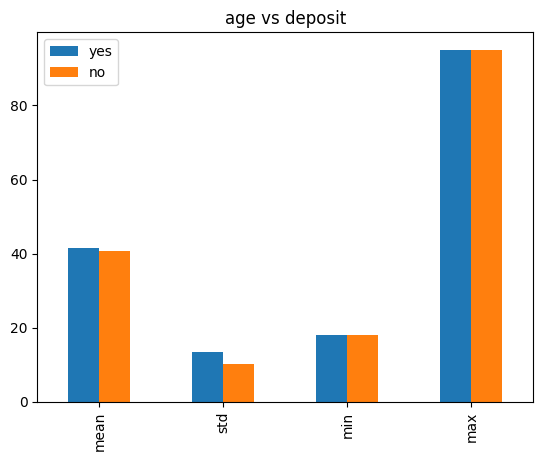

In [22]:
ad.drop(['count','25%','50%','75%']).plot.bar(title='age vs deposit')

From this plot it can be said that age column may not be a strong predictor of deposit behavior because In mean difference between yes group
and no group is only 0.84 years and also In meadian value the difference between yes and no group is only 1 year(75%) so alone age column
may not be a strong predictor of deposit behavior

## Balance vs Deposit

In [23]:
bd = pd.DataFrame()
bd['yes'] = (df[df['deposit'] == 'yes'][['balance','deposit']].describe())['balance']
bd['no'] = (df[df['deposit'] == 'no'][['balance','deposit']].describe())['balance']
bd

,yes,no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<Axes: title={'center': 'Balance vs Deposit'}>

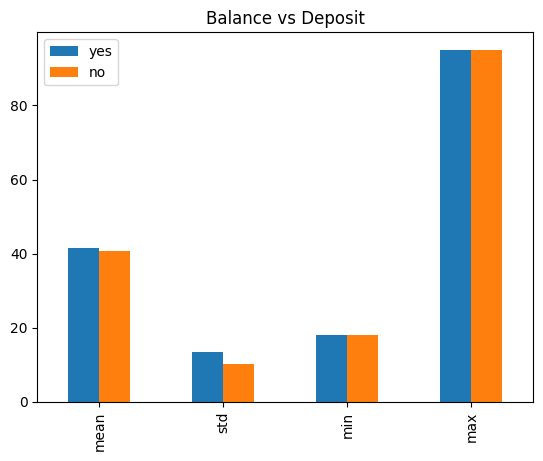

In [24]:
ad.drop(['25%','count','50%','75%']).plot.bar(title='Balance vs Deposit')

From this bar plot it can be said that people with higher account balances are more likely to make deposits.The higher standard daviation 
for depositors suggests that their balances are speard out more widely,meaning there are both low and high balance depositors. And 75% of depositer have account balance more than 2159

## Boxplot of Age column

<Axes: ylabel='age'>

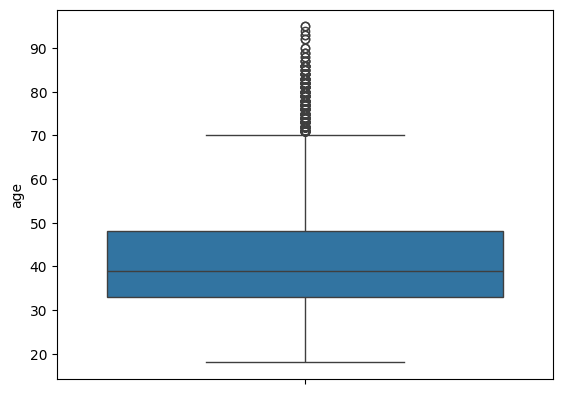

In [27]:
sns.boxplot(df['age'])

From this boxplot it can be said that age column has many outliers whose age is significantly higher than typical range we don't remove this outliers because it is valid data

## Boxplot of Balance column

<Axes: ylabel='balance'>

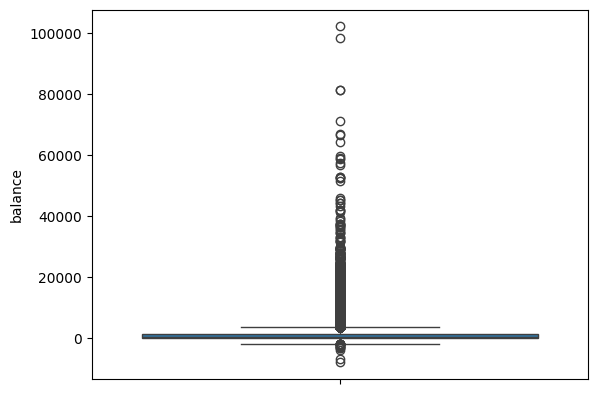

In [34]:
sns.boxplot(df['balance'])

From this boxplot it can be said that balance column has many outliers and from this i think balance is not matter for this bank campaign because those who have more balance do not feel interest in bank campaign and who have minimum balance(account balance is negative) are interested in bank campaign. So, we can propably to say that bank campaign is not dependent on balance.Customers with very low balances (negative) might behave differently.

## Campaign vs Deposit

<Axes: title={'center': 'Campaign vs Deposit'}, xlabel='campaign'>

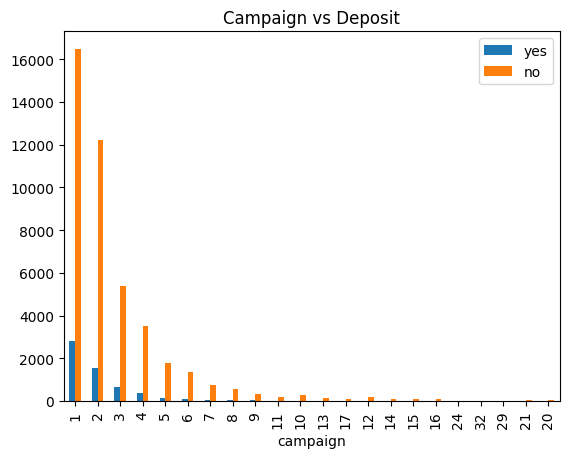

In [19]:
pcd = pd.DataFrame()

pcd['yes'] = df[df['deposit'] == 'yes']['campaign'].value_counts()
pcd['no'] = df[df['deposit'] == 'no']['campaign'].value_counts()

pcd.plot.bar(title='Campaign vs Deposit')

**Pre campaign column is represent the number of contacts performed during this campaign** From that we can say that the person who has called once during campaign is the most customer who have to subscribed.